In [1]:
# Importing naumpy and pandas libraries to read the data

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package
import numpy as np
import pandas as pd

# Read the given CSV file, and view some sample records
df = pd.read_csv("../datasets/c3o-experiments/sort.csv")
df

,instance_count,machine_type,slots,memory,data_size_MB,line_length,lines,gross_runtime
0,2,c4.2xlarge,16,30000,9530,1000,10000000,340
1,2,c4.2xlarge,16,30000,9530,1000,10000000,348
2,2,c4.2xlarge,16,30000,9530,1000,10000000,352
3,2,c4.2xlarge,16,30000,9530,1000,10000000,352
4,2,c4.2xlarge,16,30000,9530,1000,10000000,360
...,...,...,...,...,...,...,...,...
625,12,r4.2xlarge,96,732000,19260,100,200000000,146
626,12,r4.2xlarge,96,732000,19260,100,200000000,146
627,12,r4.2xlarge,96,732000,19260,100,200000000,146
628,12,r4.2xlarge,96,732000,19260,100,200000000,146


In [2]:
df = df.drop(["machine_type" ], axis=1)

dataset = df.values

X = dataset[:,0:7]

Y = dataset[:,-1]

In [3]:
from sklearn import preprocessing
x_scaler = preprocessing.StandardScaler()
y_scaler = preprocessing.StandardScaler()

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

X = x_scaler.fit_transform(X_train)
Y= y_scaler.fit_transform(Y_train.reshape(-1, 1) )

print(X,Y)



[[ 1.49842341  1.49842341  0.7086906  ... -0.43805467  1.2023664
   0.74324759]
 [ 0.90947089  0.90947089 -0.52862232 ... -0.43805467 -0.12864981
  -0.55593893]
 [ 1.49842341  1.49842341  2.54879699 ... -0.43805467  0.20410424
  -0.84930363]
 ...
 [ 0.32051838  0.32051838 -0.68725218 ... -0.43805467  0.53685829
  -0.09493726]
 [-0.85738666 -0.85738666 -0.03158209 ... -0.43805467  0.86961235
  -0.37433221]
 [ 0.32051838  0.32051838  0.03186985 ... -0.43805467  0.86961235
   0.1285787 ]] [[ 7.43247586e-01]
 [-5.55938931e-01]
 [-8.49303628e-01]
 [-4.30211203e-01]
 [-5.41969183e-01]
 [-9.05182618e-01]
 [ 1.70487939e-01]
 [-5.97848173e-01]
 [ 5.19731626e-01]
 [-4.86090193e-01]
 [-6.67696910e-01]
 [-3.32422971e-01]
 [-5.14029688e-01]
 [-1.10075908e+00]
 [-2.76543981e-01]
 [-1.64786001e-01]
 [-2.34634738e-01]
 [-7.37545648e-01]
 [-4.16241456e-01]
 [ 4.35913141e-01]
 [-8.35333880e-01]
 [ 2.60122400e+00]
 [ 4.91792131e-01]
 [-1.78755748e-01]
 [-7.93424638e-01]
 [ 2.12397181e-01]
 [ 2.85096887e-

In [10]:
from sklearn.svm import SVR
regressor = SVR(kernel='poly', degree=100)
regressor.fit(X_train,Y_train)
ypred= regressor.predict(X_test)
print(ypred)
print("\n") 
Y_test



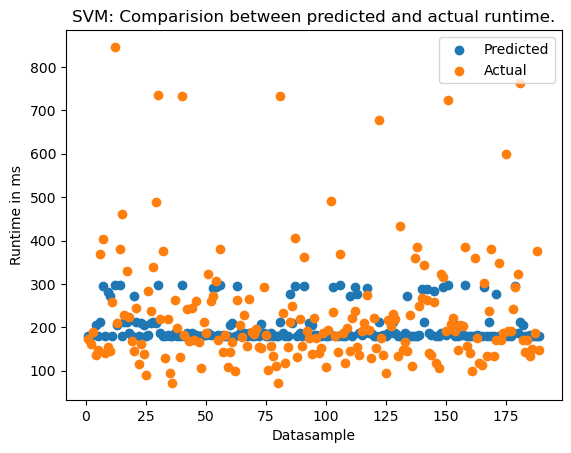

In [ ]:
import matplotlib.pyplot as plt

def plot_scatter(x_values, y_values, y_values_2):
    # Create a figure and axis
    fig, ax = plt.subplots()

    # Set the x-values as a range from 1 to the length of the list
    x_values = list(range(1, len(y_values) + 1))

    # Plot the scatter plot
    ax.scatter(x_values, y_values, label='Predicted')
    ax.scatter(x_values, y_values_2, label='Actual')


    # Set labels for x and y axes
    ax.set_xlabel('Datasample')
    ax.set_ylabel('Runtime in ms')
    ax.legend()
    # Set a title for the plot
    ax.set_title('SVM: Comparision between predicted and actual runtime.')

    # Show the plot
    plt.show()

# Example usage
list1 = [5, 9, 12, 15, 20]
list2 = [3, 7, 11, 18, 25]

plot_scatter(ypred, ypred, Y_test)